# SVM Visualization
This notebook visually explores different SVM fits.  The focus is providing simple figures, rather than an in-depth explaination of SVM

In [1]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Create synthetic data to work with

In [2]:
# Build and array of points in covering a 2d space  (Both codes below do the same things)
#x = np.array([[i,j] for i in range(100) for j in range(100)])
x = np.mgrid[0:100, 0:100].T.reshape(100*100,2)

In [3]:
# We are setting two regions of the space to "True" and the rest to "False"
#  this is the ground truth for our synthetic sample data
y = np.logical_or(np.logical_and(x[:,0] > 50, x[:,1] > 50), np.logical_and(x[:,0] > 20, x[:,1] < 10))

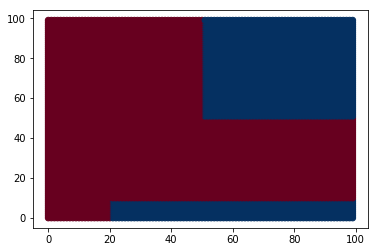

In [4]:
# Ground Truth
plt.scatter(x[:,0], x[:,1], c=y, cmap='RdBu')

In [5]:
# Select 40 random points as our sample - may have to rerun a few times to get something that looks interesting
# (try to have at least two blue points on the bottom)
train_index = np.random.permutation(100*100)[:40]
x_train = x[train_index]
y_train = y[train_index]

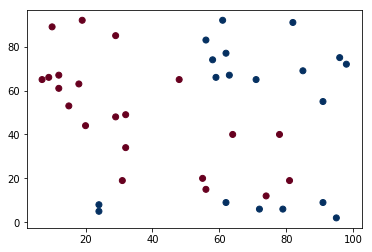

In [6]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')

## Linear SVM

In [7]:
# Boilerplate sklearn code
model = SVC(kernel='linear', shrinking=False, probability=True)
model.fit(x_train, y_train)
y_pred = model.predict(x)

In [8]:
# Useful bits if you actually need to do something with the model other than visualize
print(model.coef_)
print(model.intercept_)
model.predict_proba(x)[:,0]

[[0.04939174 0.01120354]]
[-2.96948932]


array([0.86723197, 0.86379379, 0.86028092, ..., 0.16075728, 0.15680271,
       0.15292754])

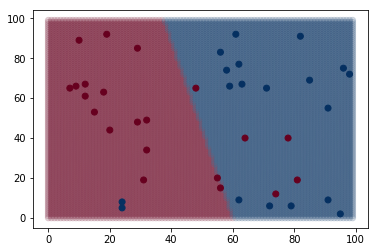

In [9]:
plt.scatter(x[:,0], x[:,1], c=y_pred, alpha=0.15, cmap='RdBu')
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')

## SVM using RBF

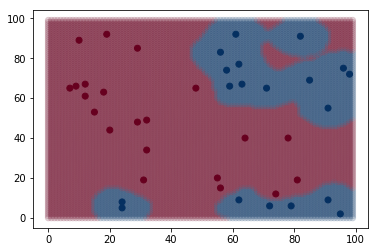

In [10]:
model_2 = SVC(gamma=0.03)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x)

plt.scatter(x[:,0], x[:,1], c=y_pred_2, alpha=0.15, cmap='RdBu')
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')

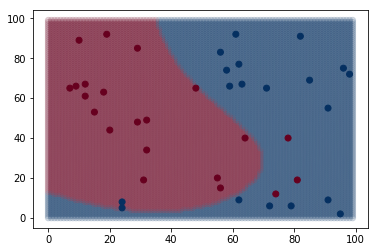

In [11]:
model_3 = SVC(gamma=0.0003, probability=True, )
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x)

plt.scatter(x[:,0], x[:,1], c=y_pred_3, alpha=0.15, cmap='RdBu')
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')

## Polynomial SVM

Not really the most sensible choice when the underlying input data is low dimensional already

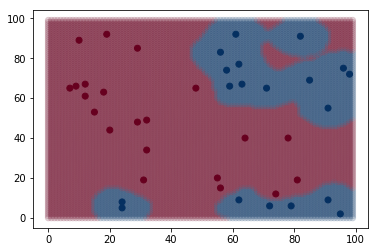

In [12]:
model_4 = SVC(gamma=0.03, kernel='poly')
model_4.fit(x_train, y_train)
y_pred_4 = model_2.predict(x)

plt.scatter(x[:,0], x[:,1], c=y_pred_4, alpha=0.15, cmap='RdBu')
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')

## Nearest Neighbor

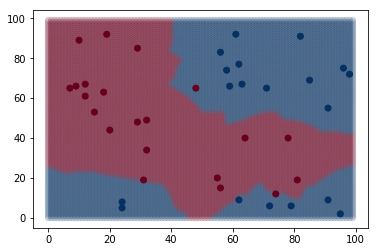

In [13]:
model_NN = KNeighborsClassifier(n_neighbors=3)
model_NN.fit(x_train, y_train)
y_pred_NN = model_NN.predict(x)

plt.scatter(x[:,0], x[:,1], c=y_pred_NN, alpha=0.15, cmap='RdBu')
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')